In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from datetime import datetime
from PIL import Image
from wordcloud import WordCloud

In [2]:
%matplotlib inline

In [3]:
plt.rcParams['figure.figsize'] = (10, 5)

In [4]:
saved_style_state = matplotlib.rcParams.copy() #give us a style state to go back to

In [5]:
# Dataset 1 (Ramen Ratings)

In [6]:
ramen_rater = pd.read_excel("Ramen_Data.xlsx", sheet_name="The Ramen Rater - Big List Of A")
ramen_rater.head()





,Review #,Brand,Variety,Style,Country,Stars,Top Ten
0,2700,Vedan,Jhen Mian Tang Spicy Hot Noodle,Pack,Taiwan,4,NaN
1,2699,Myojo,Chicken Shio Wanton Noodles,Bowl,Japan,4.5,NaN
2,2698,Nissin,Cup Noodles Chilli Crab Flavour (More Crabtastic),Cup,Singapore,4,NaN
3,2697,Maruchan,Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...,Bowl,United States,3.25,NaN
4,2696,Nongshim,Neoguri Spicy Seafood Noodle Soup,Cup,United States,5,NaN


In [7]:
ramen_rater.sample(10)


,Review #,Brand,Variety,Style,Country,Stars,Top Ten
437,2263,Sichuan Baijia,Broad Noodle Artificial Beef Flavor Hot Pot,Pack,China,4.25,NaN
1943,757,Indomie,Mi Goreng Vegan,Pack,Indonesia,4.25,NaN
2470,230,Lucky Me!,Supreme Instant Mami Noodles With Free Crackers,Bowl,Philippines,3.75,NaN
1179,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5,2015 #9
599,2101,Samyang Foods,Pojangmacha Udon,Pack,South Korea,4,NaN
2174,526,Annie Chun's,Soy Ginger Ramen,Pack,United States,1.5,NaN
2183,517,Thai Kitchen,Thai Ginger Rice Noodle,Pack,United States,4.25,NaN
2000,700,Nissin,Chikin Ramen (Local),Pack,Japan,5,NaN
1165,1535,Sau Tao,Oat Noodle Pork Rib Flavored,Pack,Hong Kong,3.5,NaN
1822,878,Nissin,Top Ramen Short Cuts Lime Chili,Pack,United States,3.75,NaN


In [31]:
ramen_rater["Style"].value_counts()

Pack          1594
Bowl           514
Cup            470
Tray           111
Box              6
Restaurant       1
Can              1
Bar              1
Name: Style, dtype: int64

In [32]:
ramen_rater["Country"].value_counts()

Japan            381
United States    340
South Korea      326
Taiwan           229
Thailand         191
China            175
Malaysia         158
Hong Kong        144
Indonesia        141
Singapore        122
Vietnam          108
UK                69
Philippines       47
Canada            41
India             39
Germany           27
Mexico            25
Australia         22
Netherlands       15
Nepal             14
Myanmar           14
Pakistan           9
Hungary            9
Bangladesh         7
Colombia           6
Cambodia           5
Brazil             5
Poland             4
Holland            4
Fiji               4
Sarawak            3
Sweden             3
Finland            3
Dubai              3
Estonia            2
Nigeria            2
Ghana              2
Phlippines         1
Name: Country, dtype: int64

In [8]:
ramen_rater["Top Ten"].value_counts()

\n          4
2016 #10    1
2012 #10    1
2014 #1     1
2013 #1     1
2013 #2     1
2013 #4     1
2013 #9     1
2013 #3     1
2012 #7     1
2016 #1     1
2012 #5     1
2012 #3     1
2012 #6     1
2012 #9     1
2012 #1     1
2012 #2     1
2013 #6     1
2014 #6     1
2014 #5     1
2014 #8     1
2014 #10    1
2016 #8     1
2016 #5     1
2016 #9     1
2016 #7     1
2015 #10    1
2015 #7     1
2015 #4     1
2015 #9     1
2015 #6     1
2015 #1     1
2013 #10    1
2015 #8     1
2014 #7     1
2014 #4     1
2014 #9     1
2012 #4     1
Name: Top Ten, dtype: int64

In [30]:
tops = ramen_rater[[type(x)is str for x in ramen_rater["Top Ten"]]]
tops[["2015" in x for x in tops["Top Ten"]]]

,Review #,Brand,Variety,Style,Country,Stars,Top Ten
1062,1638,A-Sha Dry Noodle,Veggie Noodle Tomato Noodle With Vine Ripened ...,Pack,Taiwan,5,2015 #10
1083,1617,MyKuali,Penang Hokkien Prawn Noodle (New Improved Taste),Pack,Malaysia,5,2015 #7
1115,1585,CarJEN,Nyonya Curry Laksa,Pack,Malaysia,5,2015 #4
1179,1521,Maruchan,Gotsumori Sauce Yakisoba,Tray,Japan,5,2015 #9
1192,1508,Mamee,Chef Gold Recipe Mi Kari Seribu Rasa,Pack,Malaysia,5,2015 #6
1200,1500,MyKuali,Penang Red Tom Yum Goong Noodle,Pack,Malaysia,5,2015 #1
1234,1466,Mama,Oriental Style Instant Noodles Green Curry Fla...,Pack,Thailand,5,2015 #8


In [10]:
#wordcloud plot
Text = ramen_rater['Variety']
Text.head()



0                      Jhen Mian Tang Spicy Hot Noodle
1                          Chicken Shio Wanton Noodles
2    Cup Noodles Chilli Crab Flavour (More Crabtastic)
3    Bowl Taste Of Asia Hot & Spicy Kimchi Ramen Ra...
4                    Neoguri Spicy Seafood Noodle Soup
Name: Variety, dtype: object

In [11]:
list_of_variety = Text.to_list()



In [12]:
texts= list_of_variety[0]

texts=" ".join(review for review in list_of_variety)
print ("There are {} words in the combination of all reviews.".format(len(texts)))

There are 82856 words in the combination of all reviews.


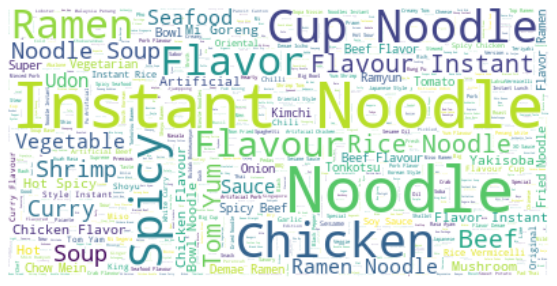

In [13]:
wordcloud = WordCloud(background_color="white",margin=2, min_font_size= 1, max_font_size=50, max_words= 1000, min_word_length=0).generate(texts)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [14]:
bowl_mask = np.array(Image.open("istockphoto-874666510-612x612.jpg"))
bowl_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [15]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val

In [16]:
transformed_bowl_mask = np.ndarray((bowl_mask.shape[0], bowl_mask.shape[1]), np.int32)

for i in range (len(bowl_mask)):
    transformed_bowl_mask[i]= list(map(transform_format, bowl_mask[i]))

In [17]:
transformed_bowl_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

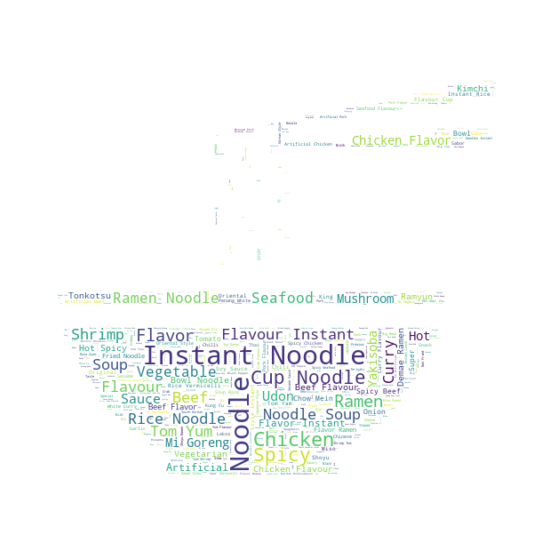

In [18]:
wc = WordCloud(background_color="white", max_words=1000, min_font_size= 1, max_font_size=30, mask=transformed_bowl_mask)

wc.generate(texts)


wc.to_file("ramen.jpg")

plt.figure(figsize=[20,10])
plt.imshow(wc, interpolation= "bilinear")
plt.axis("off")
plt.show()

In [19]:
noodle_mask = np.array(Image.open("images (3).png"))
noodle_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [20]:
def transform_format (val):
    if val == 0:
        return 255
    else:
        return val

In [21]:
transformed_noodle_mask = np.ndarray((noodle_mask.shape[0], noodle_mask.shape[1]), np.int32)

for i in range(len(noodle_mask)):
    transformed_noodle_mask[i] = list(map(transform_format, noodle_mask[i]))

In [22]:
transformed_noodle_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]])

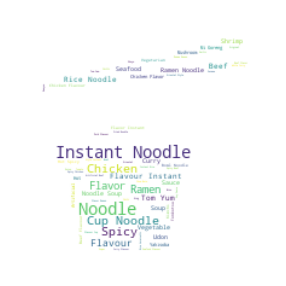

In [23]:
wc = WordCloud(background_color="white", max_words=1000, min_font_size= 2, max_font_size=30, mask=transformed_noodle_mask, contour_color="red")

wc.generate(texts)

wc.to_file("images (1).png")

plt.figure(figsize=[5,5])
plt.imshow(wc, interpolation= "bilinear")
plt.axis("off")
plt.show()

In [24]:
# Dataset 2 (Ramen Demands)
# 56 list of countries and their demands for ramen -> digits are in millions 

In [25]:
ramen_demands =pd.read_excel("Ramen_Data.xlsx", sheet_name="Demands for Instant Noodles ")
ramen_demands.head()




,Countries/Region,2016,2017,2018,2019,2020
0,China,38520.0,38960.0,40250,41450,46350
1,Indonesia,13010.0,12620.0,12540,12520,12640
2,Viet Nam,4920.0,5060.0,5200,5430,7030
3,India,4270.0,5420.0,6060,6730,6730
4,Japan,5660.0,5660.0,5780,5630,5970


In [26]:
ramen_demands.set_index("Countries/Region", inplace=True)


In [27]:
ramen_demands.tail()

,2016,2017,2018,2019,2020
Countries/Region,,,,,
Finland,10.0,10.0,10,10,10
Switzerland,10.0,10.0,10,10,10
Argentina,10.0,10.0,10,10,4
Others,1070.0,1310.0,1010,860,800
Total,97520.0,100110.0,103620,106420,116560


<AxesSubplot:xlabel='Countries/Region'>

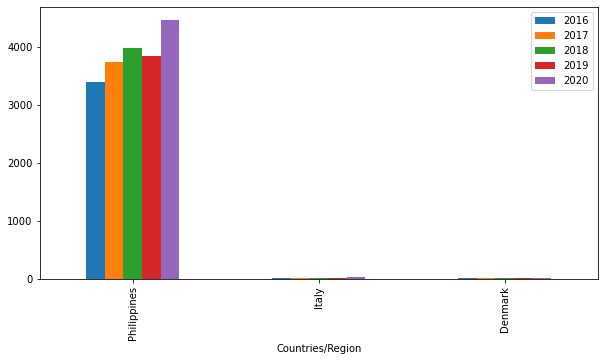

In [28]:
group_5 =ramen_demands.sample(3)
group_5.plot(kind="bar")
